In [28]:
import scanpy as sc 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import bbknn
import scvelo as scv
# sc.settings.set_figure_params(figsize=(5,4)) 
sc.settings.verbosity = 0 
scv.settings.set_figure_params(dpi_save=400, facecolor='white', fontsize=7, format='jpg',)
sc.settings.set_figure_params(dpi_save=400, facecolor='white', fontsize=7, format='jpg')

/Users/ckw/opt/anaconda3/envs/ckw/lib/python3.10/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


In [32]:
adata = sc.read_h5ad('../data/manual_plot4.h5ad')
adata_VSMC = sc.read_h5ad('../data/v4-sub-VSMC.h5ad')
adata_fib = sc.read_h5ad('../data/v4-sub-fib.h5ad')
adata_fls = sc.read_h5ad('../data/v4-sub-fls.h5ad')
adata_m2 = sc.read_h5ad('../data/v4-sub-m2.h5ad')
adata_end = sc.read_h5ad('../data/v4-sub-end.h5ad')

In [33]:
adata.obs['new_cls'] = list(adata.obs['leiden_poly'])

In [34]:
adata.obs['new_cls'][adata_m2.obs_names] = list(adata_m2.obs['leiden_poly'])
adata.obs['new_cls'][adata_fls.obs_names] = list(adata_fls.obs['leiden_poly'])
adata.obs['new_cls'][adata_fib.obs_names] = list(adata_fib.obs['leiden_poly'])
adata.obs['new_cls'][adata_VSMC.obs_names] = list(adata_VSMC.obs['leiden_poly'])
adata.obs['new_cls'][adata_end.obs_names] = list(adata_end.obs['leiden_poly'])

In [7]:
# adata.write('../data/v4-total.h5ad')

In [8]:
adata = adata[adata.obs['leiden_poly'].isin(
    ['VSMC'])]

In [9]:
adata = adata_m2

In [37]:
df = adata.obs.iloc[:,-3:]

In [48]:
df.groupby(['sample_group','leiden_poly']).count().to_excel('./count.xlsx')

In [10]:
# sc.pl.umap(adata, color=['leiden','new_cls'], save='_plot', ncols=1,size=10,add_outline=True,show=False)

In [11]:
ldata = sc.read("../data/loom/aggr.loom", cache=True)


In [12]:
scv.utils.clean_obs_names(ldata)

In [13]:
adata.obs_names_make_unique()

In [14]:
adata = scv.utils.merge(adata,ldata)

In [15]:
adata

AnnData object with n_obs × n_vars = 6427 × 4000
    obs: 'sample', 'sample_batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_poly', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'dendrogram_leiden_poly', 'hvg', 'leiden', 'leiden_colors', 'leiden_poly_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [16]:
# scv.pp.filter_genes(adata, min_shared_counts=20)
# scv.pp.normalize_per_cell(adata)
# scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
# scv.pp.log1p(adata)

In [17]:
# scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

saving figure to file ./figures/scvelo_proportions.jpg


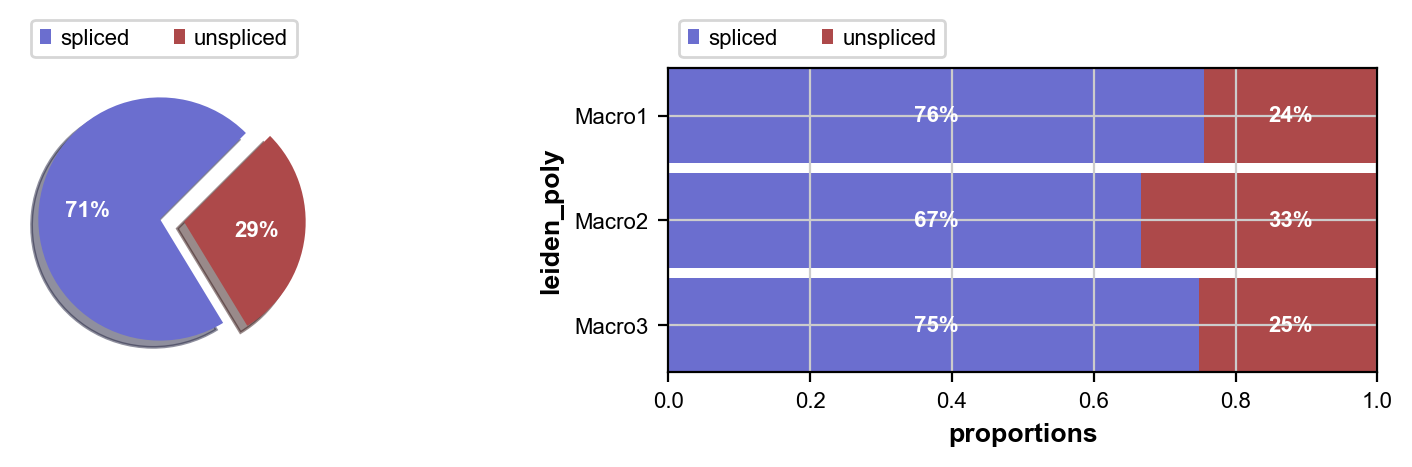

In [18]:
scv.pl.proportions(adata, groupby='leiden_poly',save=True)

In [19]:
# scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)

In [20]:
# scv.tl.recover_dynamics(adata,n_jobs=8)

In [21]:
# scv.tl.velocity?

In [22]:
# scv.tl.velocity(adata,)
scv.tl.velocity(adata,mode='deterministic')

Normalized count data: spliced, unspliced.
computing neighbors


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [23]:
# scv.pp.neighbors(adata, n_neighbors=30,n_pcs=6)

In [24]:
scv.tl.velocity_graph(adata,n_jobs=8)

computing velocity graph (using 8/8 cores)


  0%|          | 0/6427 [00:00<?, ?cells/s]

    finished (0:00:07) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [25]:
# adata.uns['new_cls_colors'] = ['#1f77b4',
#  '#ff7f0e',
#  '#279e68',
#  '#d62728',
#  '#aa40fc',
#  '#8c564b',
#  '#e377c2',
#                                 '#17becf',
#  '#b5bd61',

#  '#aec7e8',
#    '#98df8a',                             
#  '#ffbb78',

#  '#ff9896',
#  '#c5b0d5',
#  '#c49c94',
#  '#f7b6d2',
#  '#dbdb8d']

In [26]:
# sc.pl.umap(adata, color='new_cls')

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_m2.jpg


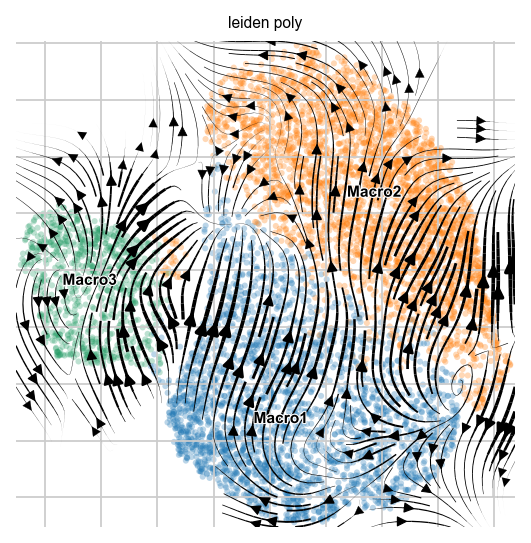

In [27]:
scv.pl.velocity_embedding_stream(adata, basis='X_umap', 
                                 color='leiden_poly',save='m2',
                                size=30,
                                 density=2,
                                 smooth=2)

In [196]:
scv.tl.rank_velocity_genes(adata, groupby='leiden_poly', min_corr=.3)

ranking velocity genes


/Users/ckw/opt/anaconda3/envs/ckw/lib/python3.10/site-packages/scvelo/tools/utils.py:501: DeprecationWarning: Please use `rankdata` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import rankdata


    finished (0:00:07) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


In [55]:
df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])
df

/var/folders/0q/0x0df50j27b1w78yn0n106jc0000gp/T/ipykernel_12470/3284001970.py:1: DeprecationWarning: `scvelo.read_load.get_df` is deprecated since scVelo v0.2.4 and will be removed in a future version. Please use `scvelo.core.get_df` instead.
  df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])


Endothelial Fibroblast-like Synoviocytes Fibroblasts Macrophages-M2  \
0        MAGI1                        ITGB8       PXDNL         SLC8A1   
1        MECOM                      ZNF385B       HMCN2          MERTK   
2        PTPRM                       ERRFI1        NOX4         ATP8B4   
3     RALGAPA2                   AC005062.1       MFAP4          RBM47   
4       DIPK2B                         ANK3       KCND2          PTPRJ   
..         ...                          ...         ...            ...   
95       EGFL7                        HPGDS       SLIT3         FCER1G   
96     COL21A1                        FNDC1     C1QTNF4           TPM1   
97     CCDC88C                         EDN1       ADH1C         DOCK10   
98        CD36                         MMP2      ANGPT1          MARCO   
99        CTSC                       SLAMF7        TRDN          CYTIP   

     T cells         VSMC  
0   ARHGAP15        PRKG1  
1      SKAP1         CLMN  
2     RIPOR2         RGS6  
3        TOX         CDH6  
4        ITK        MRVI1  
..       ...          ...  
95     TPSB2        CCDC3  
96     ALOX5         MYL9  
97       A2M         FHL2  
98      ETS1  PALM2-AKAP2  
99      FCMR        SYNE2  

[100 rows x 6 columns]

In [57]:
# scv.pl.velocity(adata,['CCN2'],color='leiden_poly',save='fls2',show=False,
#                dpi=300)

calculating cell cycle phase
-->     'S_score' and 'G2M_score', scores of cell cycle phases (adata.obs)


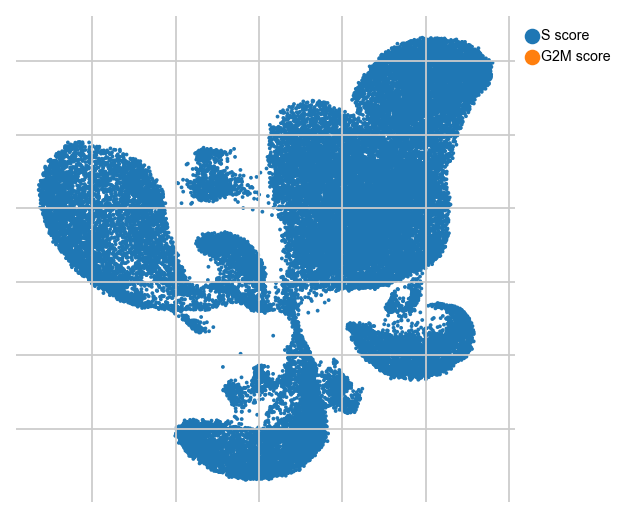

In [65]:
scv.tl.score_genes_cell_cycle(adata)
scv.pl.scatter(adata, color_gradients=['S_score', 'G2M_score'], smooth=True, perc=[10, 90])

In [66]:
# s_genes, g2m_genes = scv.utils.get_phase_marker_genes(adata)
# s_genes = scv.get_df(adata[:, s_genes], 'spearmans_score', sort_values=True).index
# g2m_genes = scv.get_df(adata[:, g2m_genes], 'spearmans_score', sort_values=True).index

# kwargs = dict(frameon=False, ylabel='cell cycle genes')
# scv.pl.scatter(adata, list(s_genes[:2]) + list(g2m_genes[:3]), **kwargs)

In [67]:
# scv.pl.velocity(adata, ['LUM','IGFBP6', 'COL1A1','ASPN', 'FBLN1', 'THY1'], ncols=2, add_outline=True)

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


/Users/ckw/opt/anaconda3/envs/ckw/lib/python3.10/site-packages/scvelo/plotting/utils.py:866: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = pl.colorbar(smp, orientation=orientation, cax=cax)
/Users/ckw/opt/anaconda3/envs/ckw/lib/python3.10/site-packages/scvelo/plotting/utils.py:866: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = pl.colorbar(smp, orientation=orientation, cax=cax)


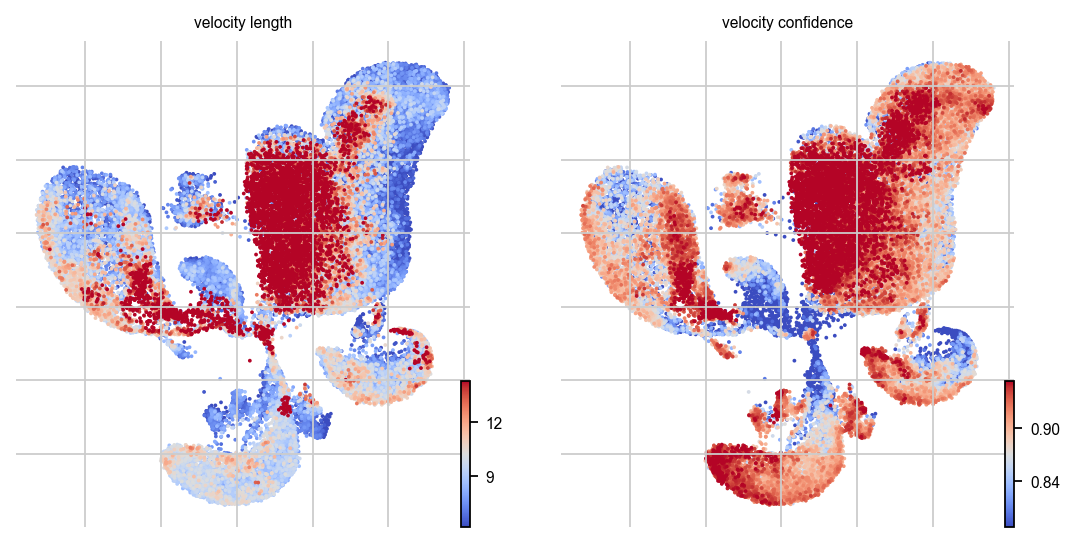

In [68]:
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[10, 90])

In [69]:
# import dataframe_image as dfi

In [70]:
import matplotlib.pyplot as plt

In [71]:
import seaborn as sns

In [72]:
df2 = adata.obs.groupby('leiden')[keys].mean().T
df2 = df2.style.background_gradient(cmap='coolwarm',axis=1)

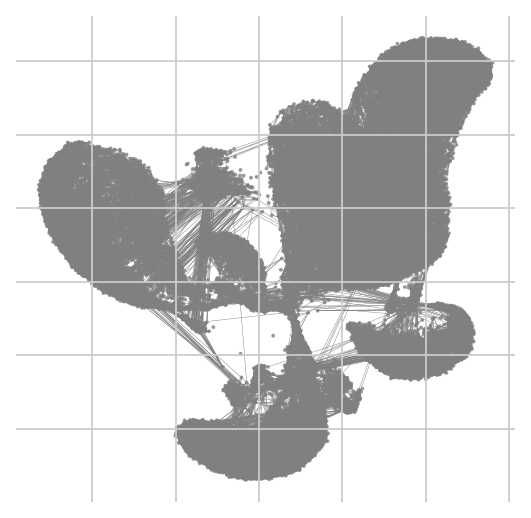

In [73]:
scv.pl.velocity_graph(adata, threshold=.1)


/Users/ckw/opt/anaconda3/envs/ckw/lib/python3.10/site-packages/scvelo/plotting/utils.py:866: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = pl.colorbar(smp, orientation=orientation, cax=cax)


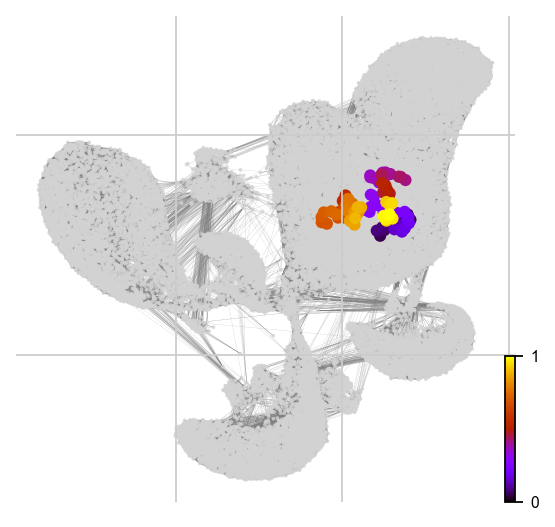

In [74]:
x, y = scv.utils.get_cell_transitions(adata, basis='umap', starting_cell=70)
ax = scv.pl.velocity_graph(adata, c='lightgrey', edge_width=.05, show=False)
ax = scv.pl.scatter(adata, x=x, y=y, s=120, c='ascending', cmap='gnuplot', ax=ax)

or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing terminal states
    identified 3 regions of root cells and 5 regions of end points .
    finished (0:00:04) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


/Users/ckw/opt/anaconda3/envs/ckw/lib/python3.10/site-packages/scvelo/plotting/utils.py:866: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = pl.colorbar(smp, orientation=orientation, cax=cax)


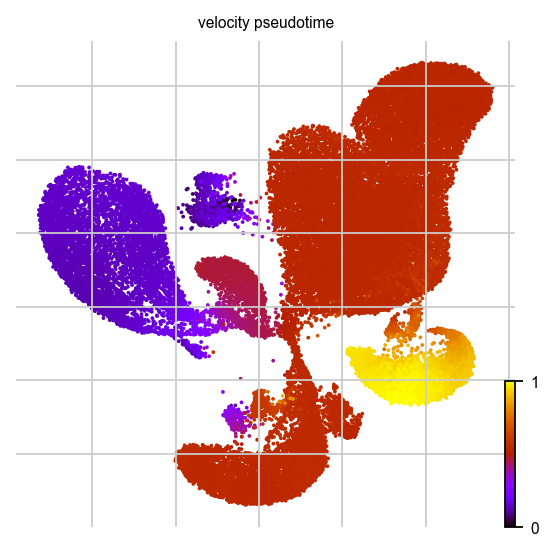

In [75]:
scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot')

In [76]:
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']

In [77]:
scv.tl.paga(adata, groups='leiden_poly')

running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:04) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


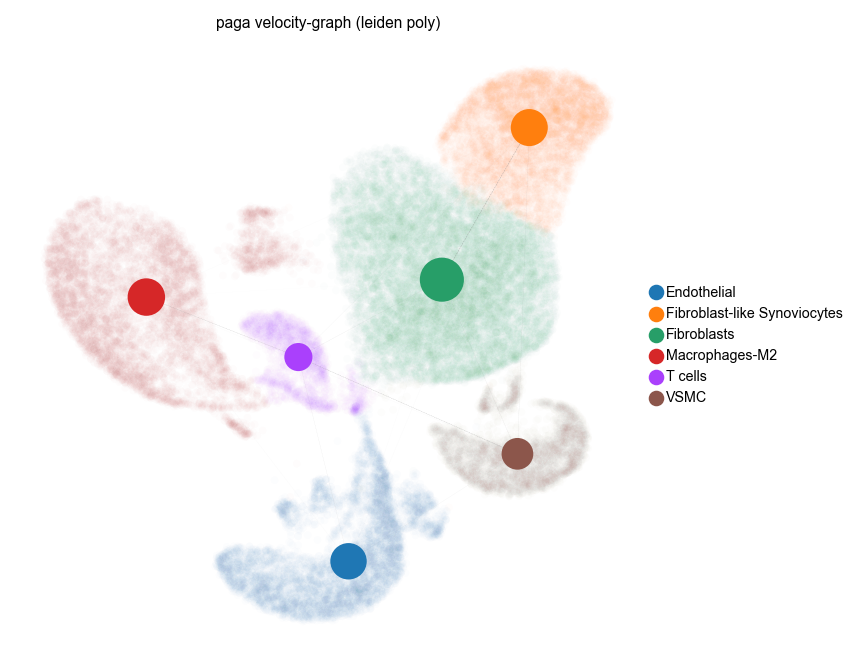

In [81]:
scv.pl.paga(adata, basis='umap', size=50, alpha=.01,
          node_size_scale=1.5,figsize=(5,5),min_edge_width=10)

In [82]:
import pandas as pd

In [83]:
# root = []
# typecsv = pd.read_csv('../data/test_workflow3/HVG/0.4_resultFile/celltype.txt')
# for i in range(typecsv.shape[1]):
#     root.append(typecsv.iloc[0,i])

In [84]:
# root

In [91]:
scv.tl.recover_dynamics(adata,n_jobs=6)

recovering dynamics (using 6/8 cores)


  0%|          | 0/950 [00:00<?, ?gene/s]

    finished (0:19:59) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [92]:
scv.tl.velocity(adata,mode='dynamical')
# 

computing velocities
    finished (0:00:33) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [93]:
scv.tl.velocity_graph(adata)

or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing velocity graph (using 1/8 cores)


  0%|          | 0/37135 [00:00<?, ?cells/s]

    finished (0:00:17) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [94]:
df = adata.var
df = df[(df['fit_likelihood'] > .1) & df['velocity_genes'] == True]

kwargs = dict(xscale='log', fontsize=16)
with scv.GridSpec(ncols=3) as pl:
    fig = plt.figure(figsize=(10,4))
    fig.subplots_adjust( wspace=0.0, hspace=0.25)
    pl.hist(df['fit_alpha'], xlabel='transcription rate', **kwargs)
    pl.hist(df['fit_beta'] * df['fit_scaling'], xlabel='splicing rate', xticks=[.1, .4, 1], **kwargs)
    pl.hist(df['fit_gamma'], xlabel='degradation rate', xticks=[.1, .4, 1], **kwargs)
    
    plt.savefig('./figures/123.jpg')
    plt.close()

<Figure size 960x320 with 0 Axes>

computing latent time using root_cells as prior
    finished (0:00:08) --> added 
    'latent_time', shared time (adata.obs)


/Users/ckw/opt/anaconda3/envs/ckw/lib/python3.10/site-packages/scvelo/plotting/utils.py:866: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = pl.colorbar(smp, orientation=orientation, cax=cax)


saving figure to file ./figures/scvelo__.jpg


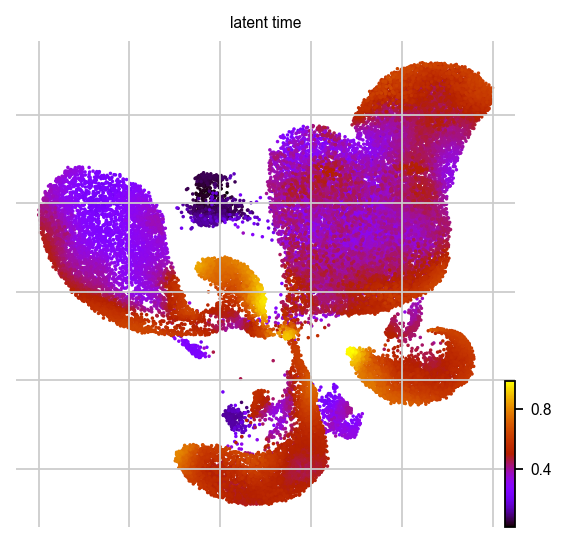

In [127]:
scv.tl.latent_time(adata, min_confidence=0.5)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=10,save='_',smooth=10,normalize_data=True)

/Users/ckw/opt/anaconda3/envs/ckw/lib/python3.10/site-packages/seaborn/matrix.py:306: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


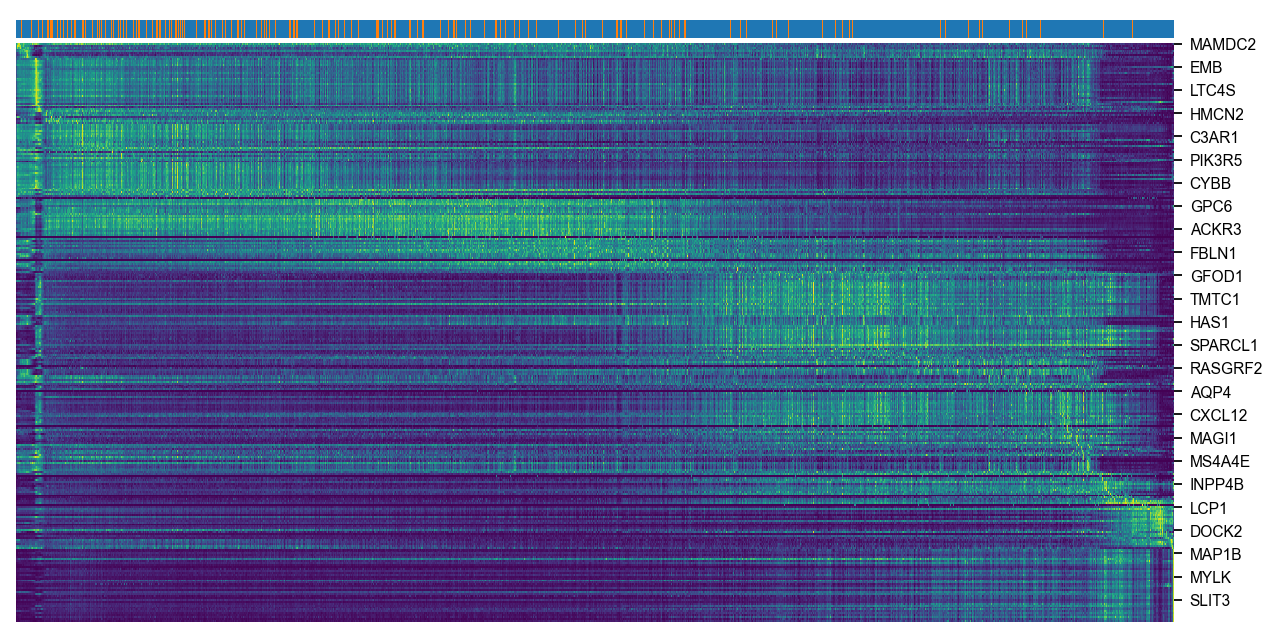

In [122]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, sortby='latent_time', col_color='sample_group',colorbar=True)

In [123]:
# top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index
# scv.pl.scatter(adata, basis=top_genes[:15], ncols=5, frameon=False,color='leiden')

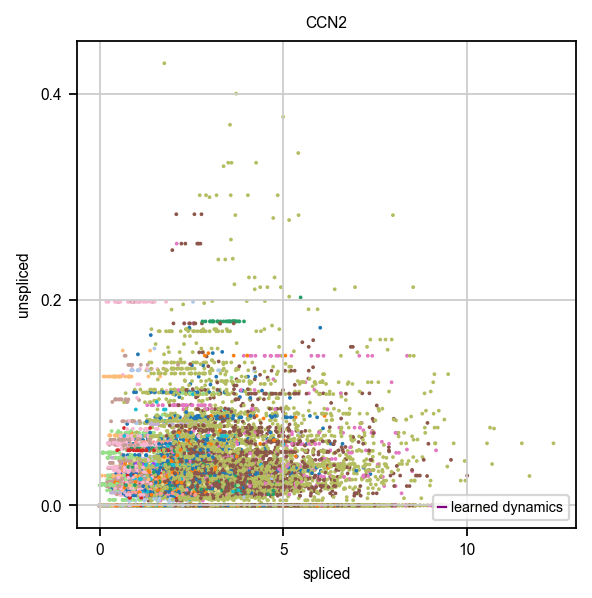

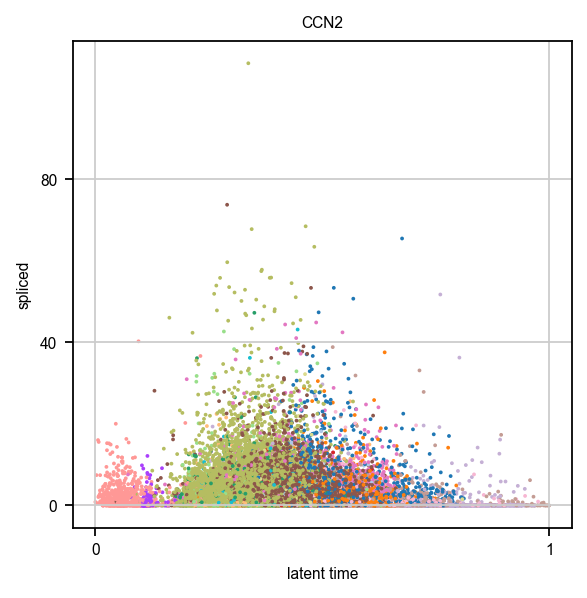

In [121]:
scv.pl.scatter(adata, 'CCN2', color='new_cls')
scv.pl.scatter(adata, x='latent_time', y='CCN2',color='new_cls')

In [164]:
scv.tl.rank_dynamical_genes(adata, groupby='leiden')
df = scv.get_df(adata, 'rank_dynamical_genes/names')
df.head(5)

ranking genes by cluster-specific likelihoods
    finished (0:00:05) --> added 
    'rank_dynamical_genes', sorted scores by group ids (adata.uns)


Neutrophil|Brush cell (Tuft cell)  B cell  \
0                             Anxa1  H2-Eb1   
1                            Clec4d    Blnk   
2                               Gda   H2-Aa   
3                              Ccl6    Cd74   
4                              Mmp8  Atp1b1   

  Endothelial cell|Hematopoietic stem cell Macrophage|Ciliated cell  \
0                                   Stxbp6                     Klf1   
1                                     Lrp1                     Gypa   
2                                 Arhgef37                    Hemgn   
3                                   Ms4a6c                    Mgst3   
4                                   Cx3cr1                 Tmem120b   

  Neutrophil|Cycling basal cell Natural killer cell|T cell  \
0                         Kif11                       Ccl5   
1                         Birc5                      Klre1   
2                         Anxa1                      Klra9   
3                           Cd9                     Gimap6   
4                       Gm47071                      Klra8   

  Ciliated cell|Brush cell (Tuft cell) Macrophage|Brush cell (Tuft cell)  
0                               Akap12                            Cd300e  
1                                Rad18                               Ace  
2                                Cecr2                           Gm48614  
3                                Birc5                               Hfe  
4                              Pou2af1                             Pparg

In [ ]:
# for cluster in celltype:
#     scv.pl.scatter(adata, df[cluster][:5], ylabel=cluster, frameon=False,color='leiden')

In [ ]:
scv.tl.differential_kinetic_test(adata, var_names=list(top_genes[:4]), groupby='leiden')

In [ ]:
var_names = list(top_genes[:4])

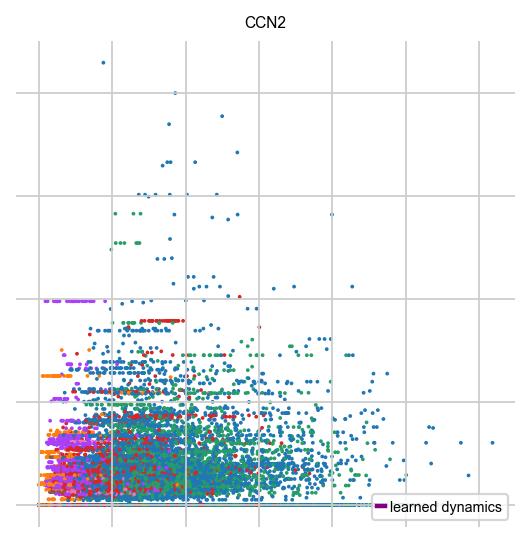

In [116]:
kwargs = dict(linewidth=2, add_linfit=True, frameon=False)
scv.pl.scatter(adata, basis='CCN2', add_outline='fit_diff_kinetics', **kwargs,color='leiden')

In [117]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:100]
scv.tl.differential_kinetic_test(adata, var_names=top_genes, groupby='leiden')

testing for differential kinetics
    finished (0:02:48) --> added 
    'fit_diff_kinetics', clusters displaying differential kinetics (adata.var)
    'fit_pvals_kinetics', p-values of differential kinetics (adata.var)


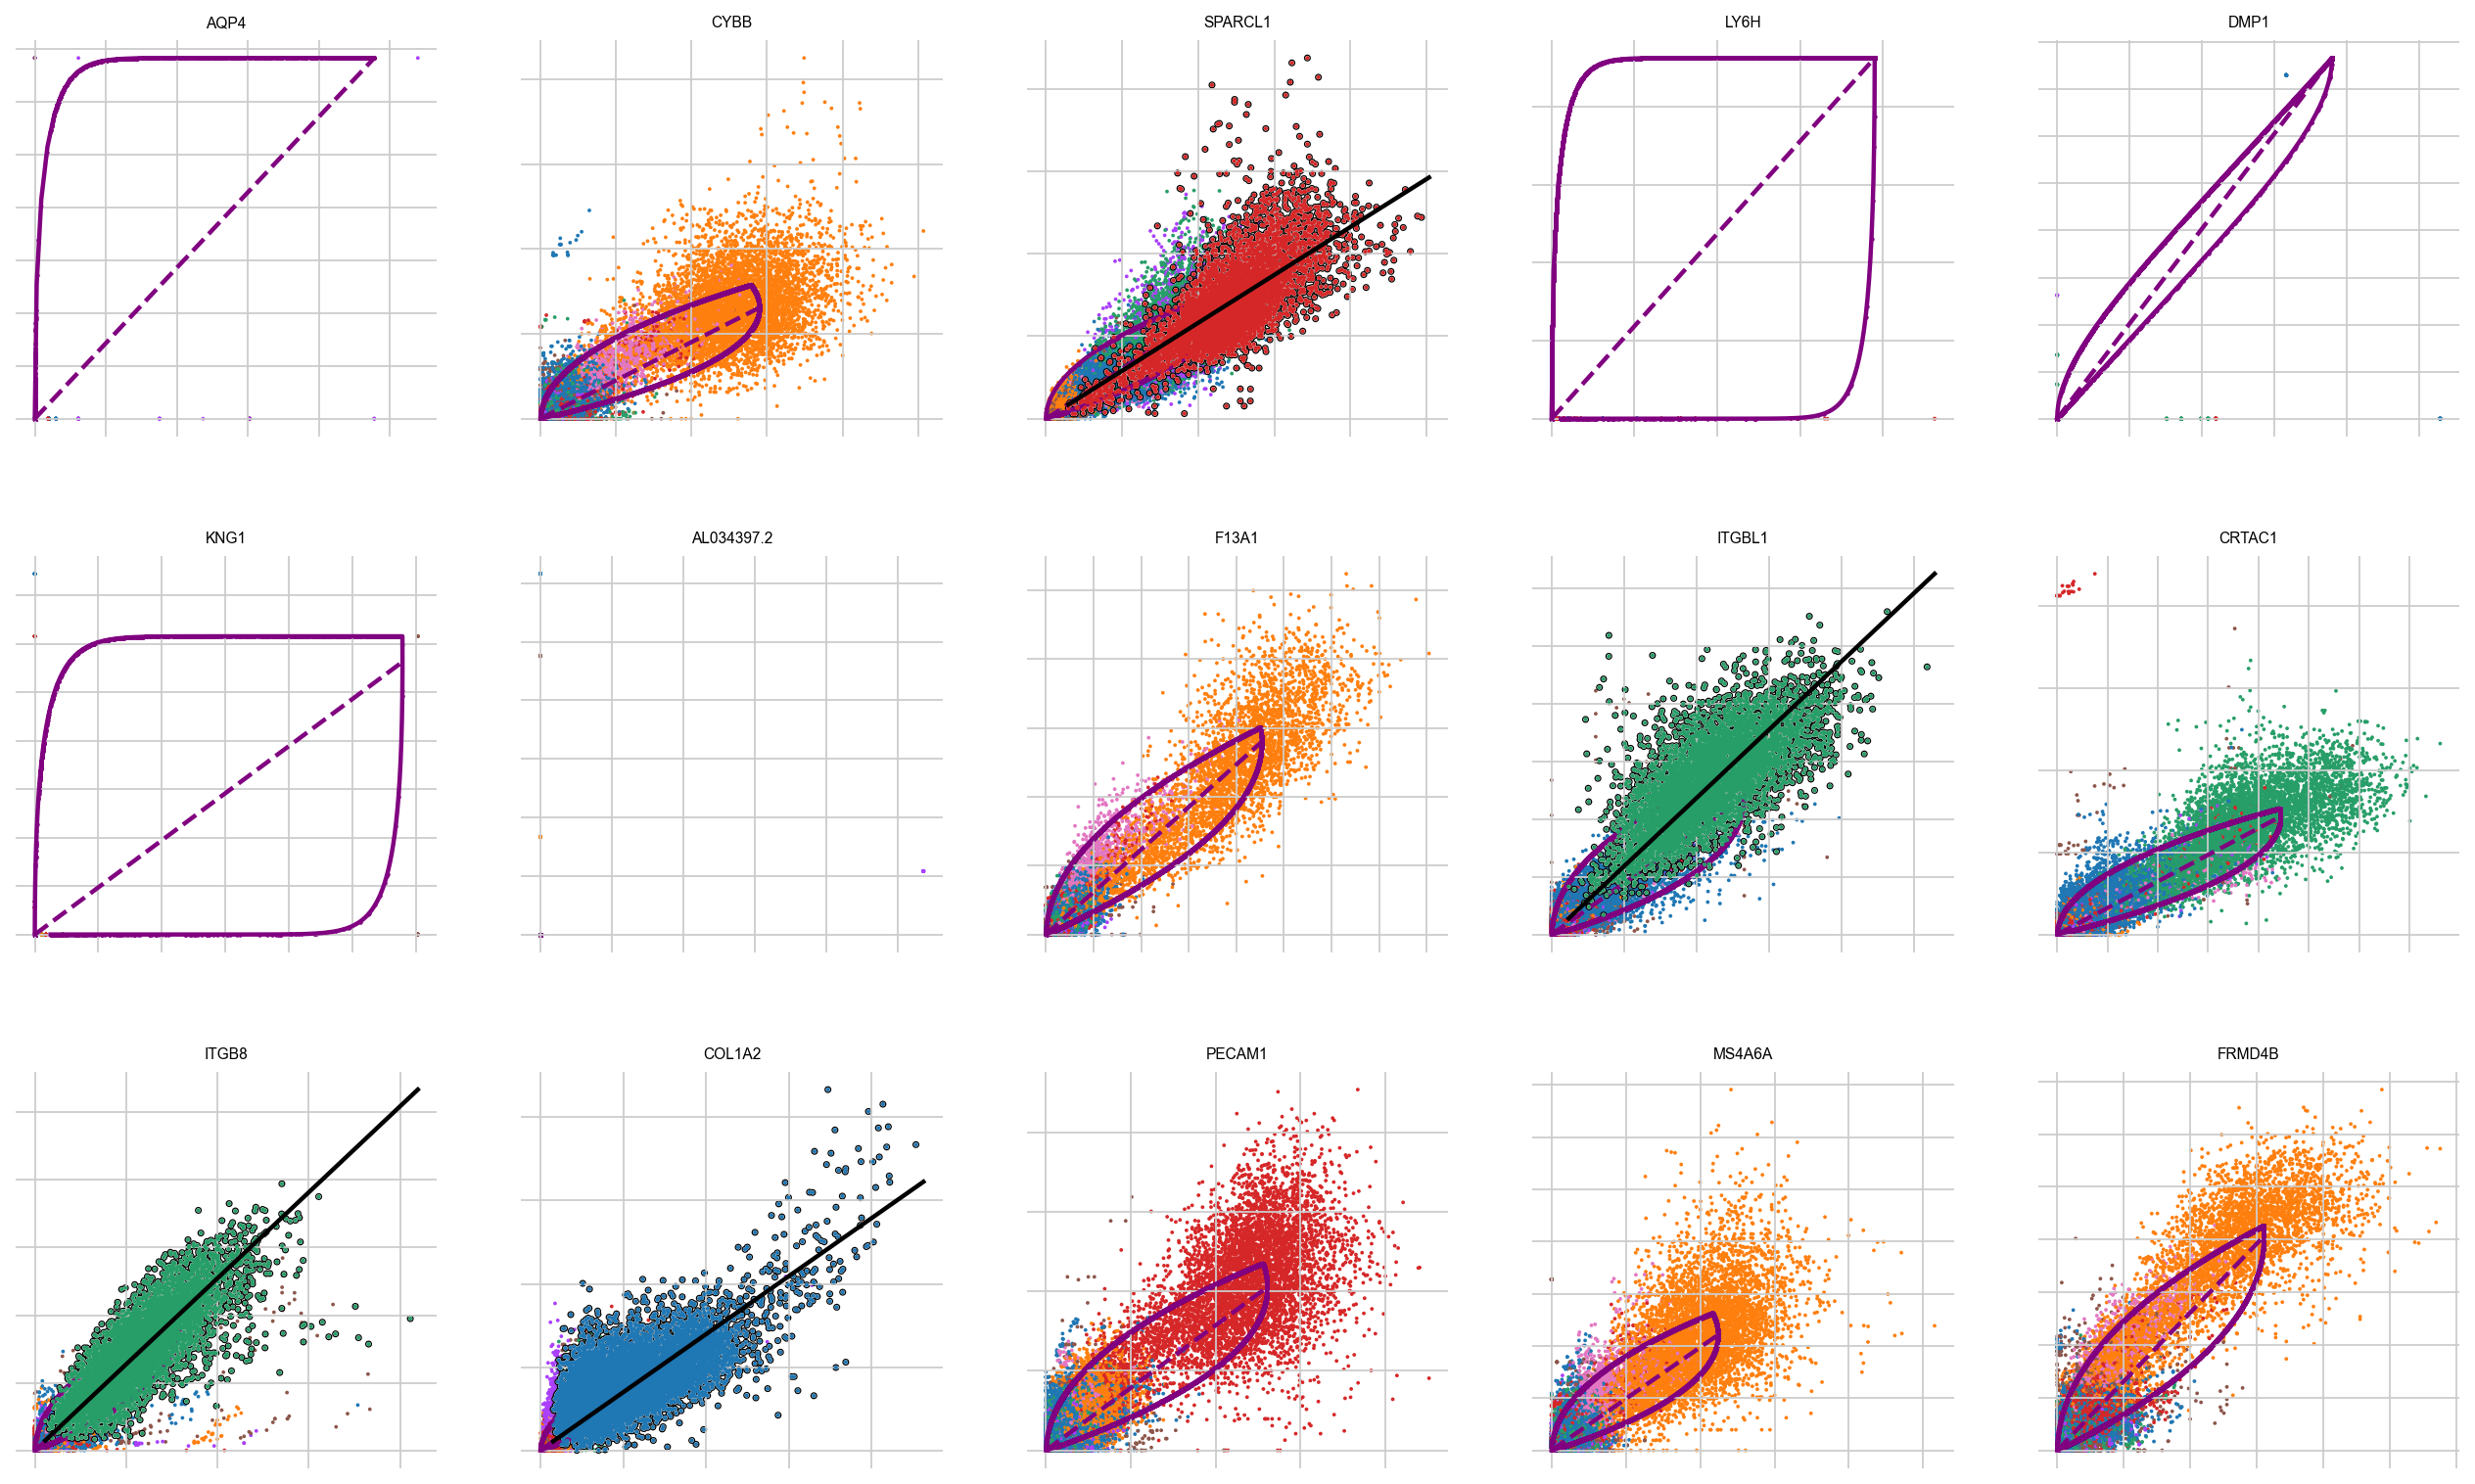

In [118]:
scv.pl.scatter(adata, basis=top_genes[:15], ncols=5, add_outline='fit_diff_kinetics', **kwargs)

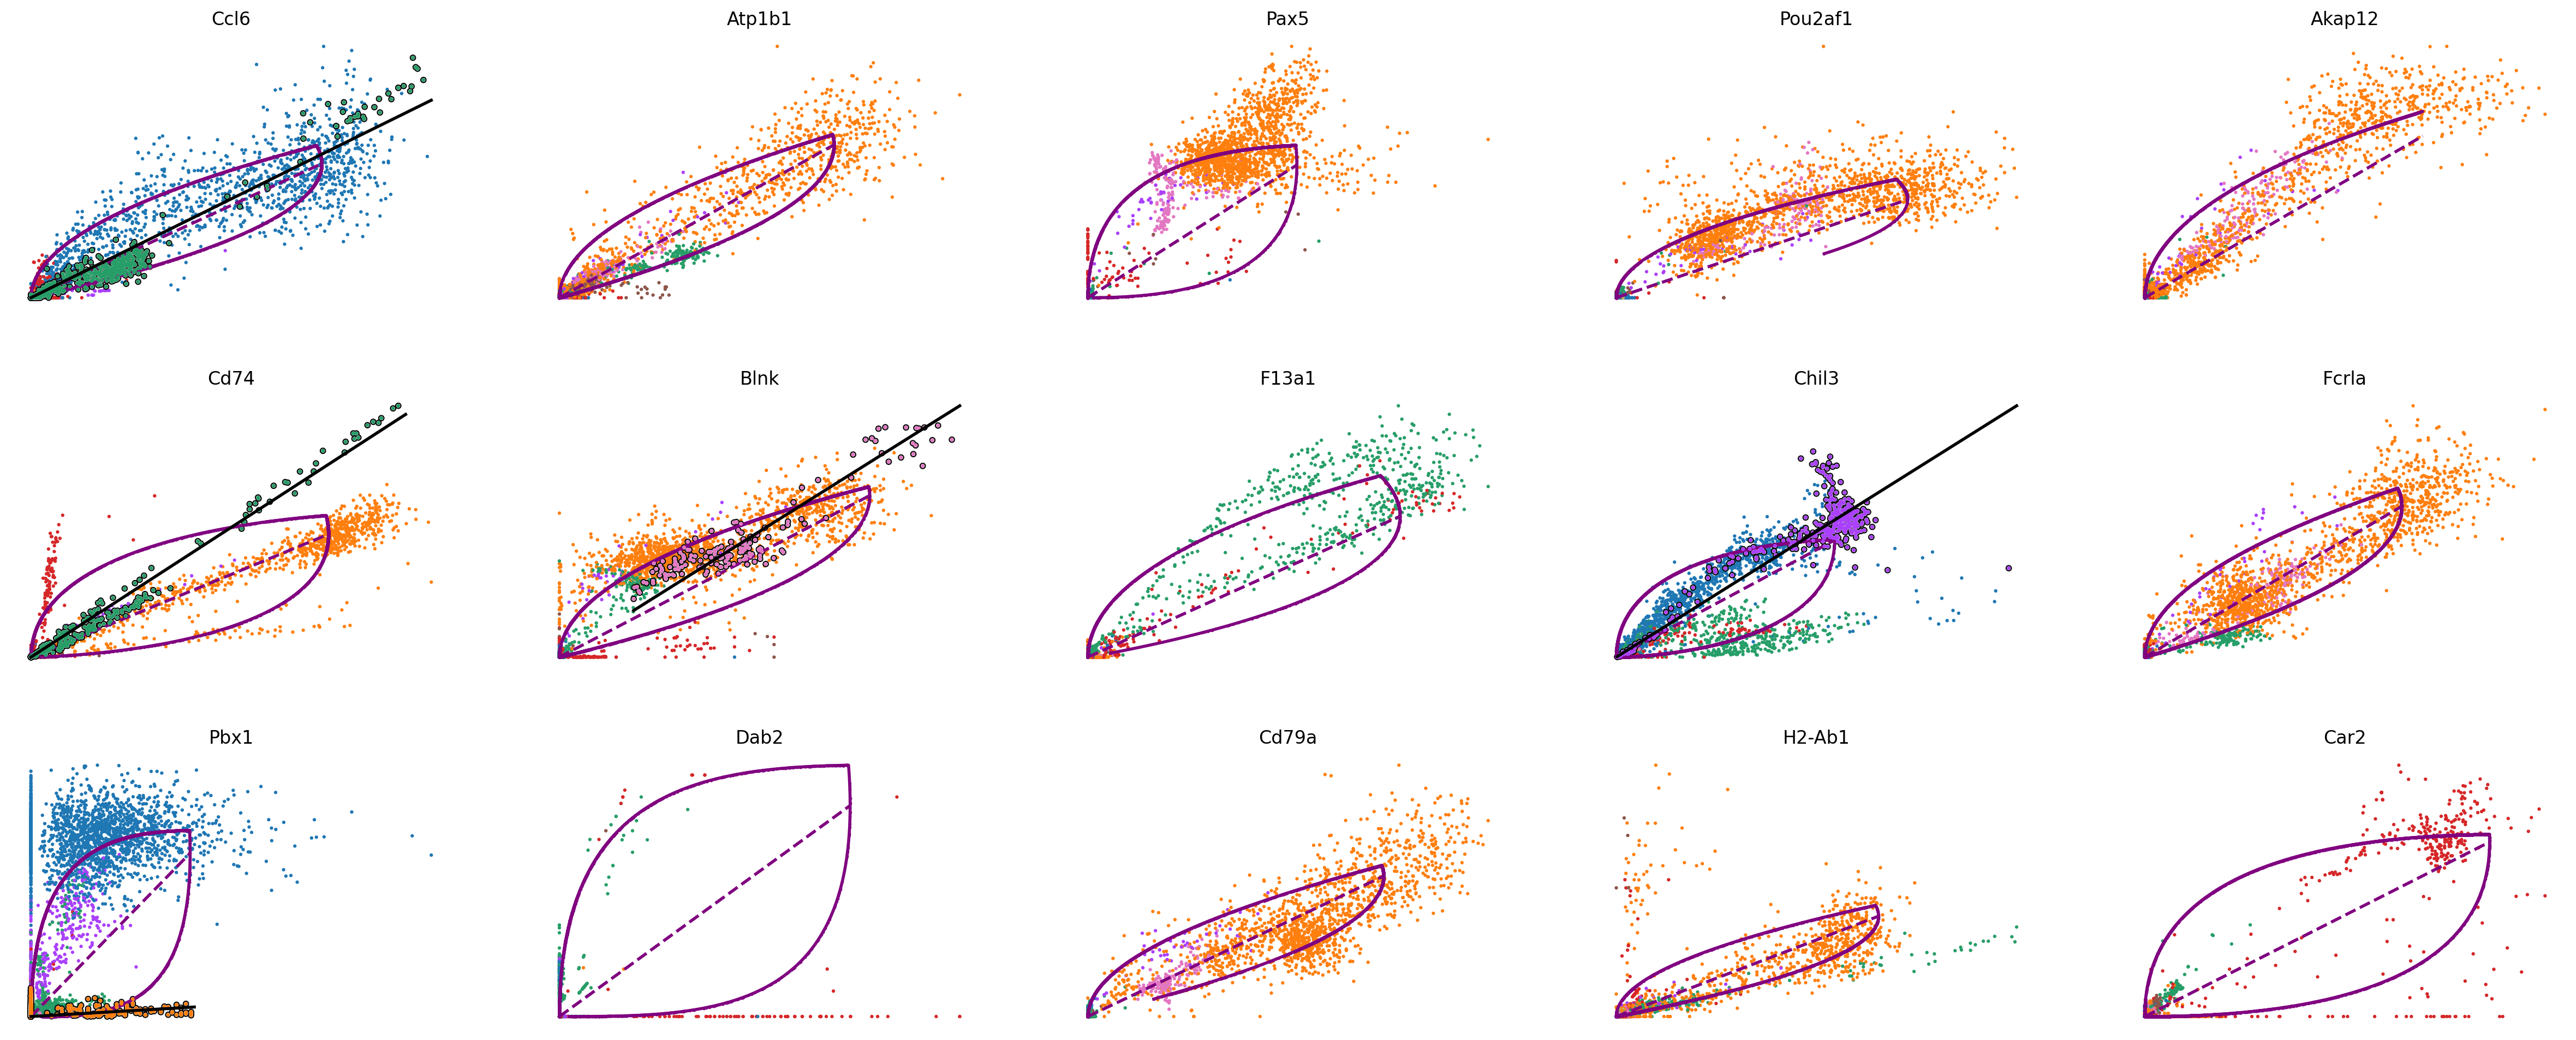

In [213]:
scv.pl.scatter(adata, basis=top_genes[15:30], ncols=5, add_outline='fit_diff_kinetics', **kwargs)


In [71]:
scv.tl.velocity(adata, diff_kinetics=True)
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:12) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing velocity graph (using 1/8 cores)


  0%|          | 0/37135 [00:00<?, ?cells/s]

    finished (0:01:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


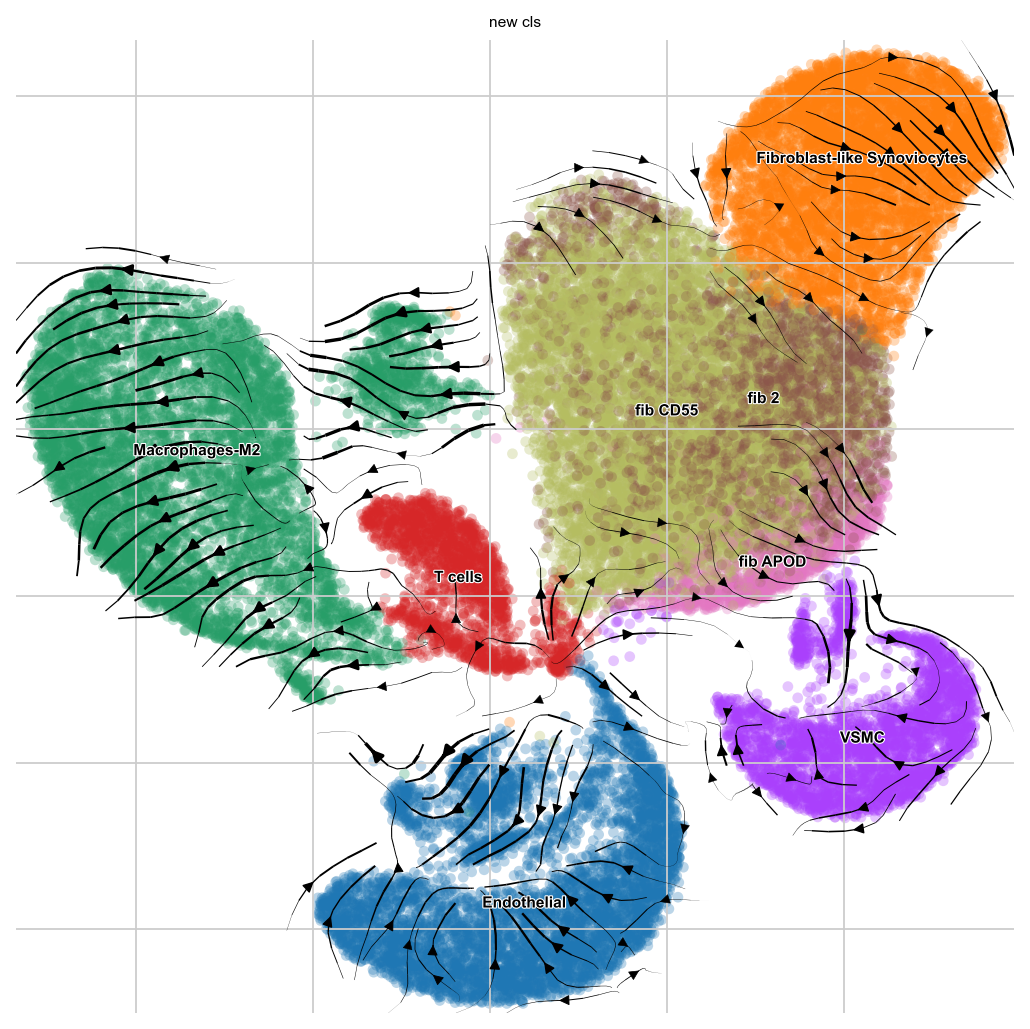

In [75]:
scv.pl.velocity_embedding_stream(adata, color='new_cls',figsize=(8,8))
